# Retrieving news from Event Registry

In [3]:
%matplotlib inline
from eventregistry import *
from eventRegistryHandler import *
from dataHandler import *
import seaborn as sns

er = EventRegistry(apiKey = "1f418876-731f-4041-b042-2d6d26d93fc7")

using user provided API key for making requests
Event Registry host: http://eventregistry.org
Text analytics host: http://analytics.eventregistry.org


In [ ]:
bias_file = pd.read_csv("SiriaData/bias/outlets_political_stance")
columns = ['categories','uri','url','source.uri','source.title','title','body','date','dataType','lang','source.location.country.label.eng','source.location.label.eng','sentiment','sim']

FINAL_loc = "title"
FINAL_sim = 0.9
FINAL_n = -1

In [ ]:
keywords = ["Venezuela","Venezuela","Venezuela"]#"Syrien","Síria","Syria"
languages = ["deu","por","eng"]

for key, lan in zip(keywords, languages):
    print key, lan
    lan_iter = get_news_iterator(er=er, keyword=key, language=lan, loc=FINAL_loc, n_items=FINAL_n, outlets_ids=None)
    data = retrieve_news_2(lan_iter, columns)
    data = add_country_location(data)
    data = add_bias_information(bias=bias_file, news=data, match_similarity=FINAL_sim)
    data.to_csv("EventRegistryData/news_"+key+"_"+lan+".csv", index = False, header=True, encoding="utf-8")

TODO: 
* Use dict lang:(keywords) instead of two lists to define language and keywords
* Add column informing the keyword used to crawl each news
* Use date as parameter to retrive only news from a not crawled period of time


In [ ]:
#deu_outlets_ids =["jungefreiheit.de"]#,"faz.net","spiegel.de","taz.de","zeit.de","bild.de","welt.de"
#pt_outlets_ids =["brasil247.com","cartacapital.com.br","oantagonista.com","veja.abril.com.br"]
#eng_outlets_ids =["huffpost.com"],"foxnews.com","breitbart.com","washingtonpost.com","reuters.com"]

## Dataset Description

### Joining tables

In [4]:
import glob

path = r'EventRegistryData/'
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None)
    li.append(df)

news = pd.concat(li, axis=0, ignore_index=True)
news["subject"] = news.title.apply(lambda x: "venezuela" if "venezuela" in x.lower() else "syria")

### Dataset Overview

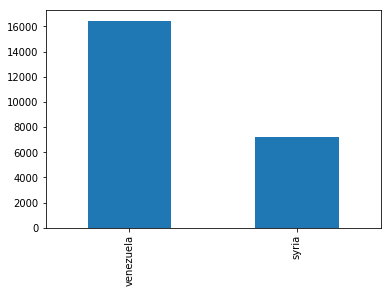

In [5]:
news.subject.value_counts().plot(kind="bar")

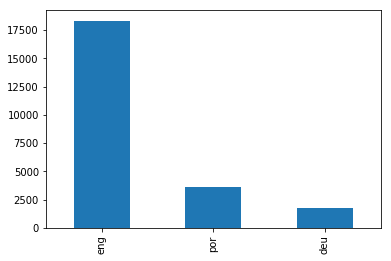

In [6]:
news.lang.value_counts().plot(kind="bar")

In [7]:
len(news["country_location"].unique())

105

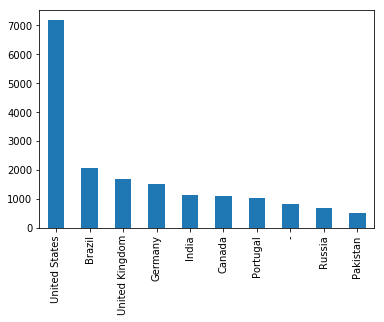

In [8]:
news.country_location.value_counts()[0:10].plot(use_index=True, kind="bar")

In [9]:
len(news["source.title"].unique())

1539

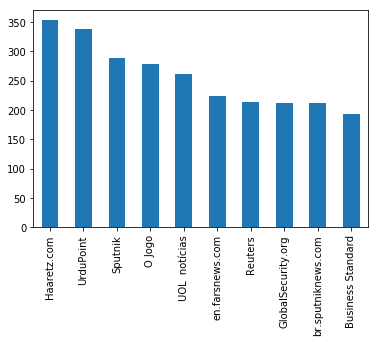

In [10]:
news["source.title"].value_counts()[0:10].plot(kind="bar")

### USA, UK, Canada, Germany and Brazil

In [41]:
isin = news.country_location.isin(["United States","Brazil","Germany","United Kingdom","Canada"])
news_countries = news[isin]

In [42]:
news_countries.shape

(13530, 17)

Number of news by country:

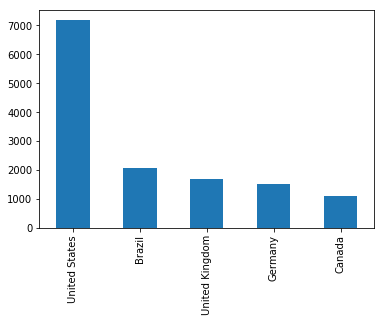

In [43]:
news_countries.country_location.value_counts().plot(kind="bar")

### Do the news subjectivities rates changes according to the countries news media?

Are the news' subjectivities, over a predefined subject, of Brazilian, Germany and American news outlets significantly different?

Number of news by country:

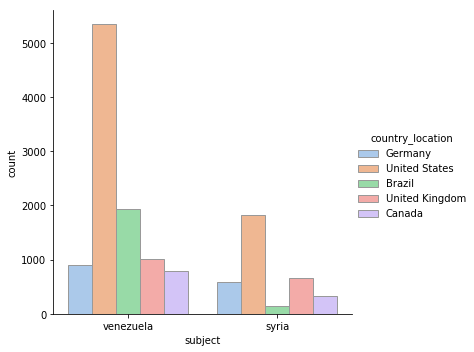

In [44]:
sns.catplot(x="subject", hue="country_location", kind="count", palette="pastel", edgecolor=".6", data=news_countries)

Number of news by language and country:

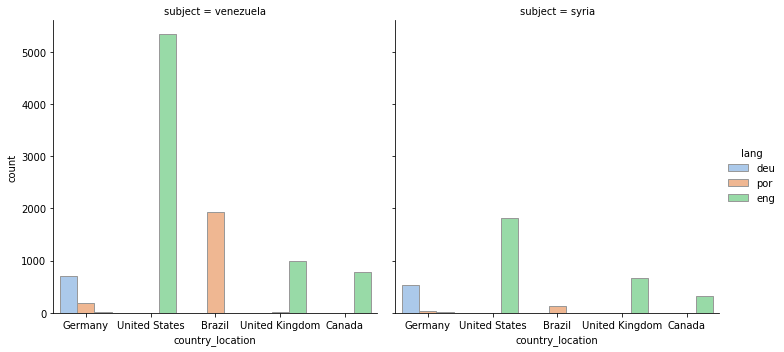

In [45]:
sns.catplot(x="country_location", hue="lang", col="subject", kind="count", palette="pastel", edgecolor=".6", data=news_countries)

### Does the news outlets political slant have an influence on the subjectivity rates?

News by political orientation in all countries:

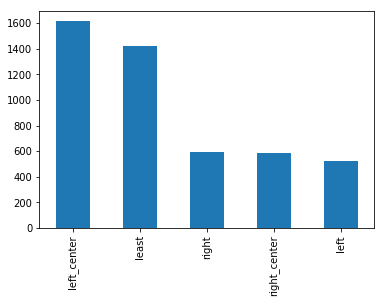

In [46]:
news.stance.value_counts().plot(kind="bar")

News by political orientation in USA, UK, Canada, Germany and Brazil:

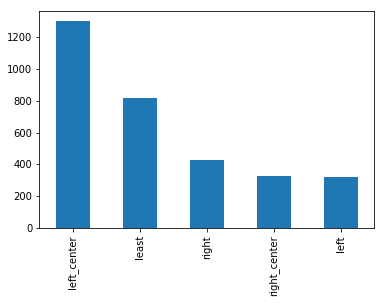

In [47]:
news_countries.stance.value_counts().plot(kind="bar")

Political slant by country and subject:

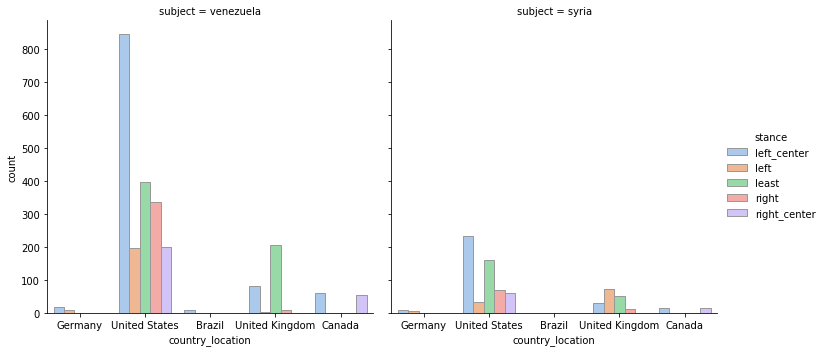

In [48]:
sns.catplot(x="country_location", hue="stance", col="subject", kind="count", palette="pastel", edgecolor=".6", data=news_countries)

Encontrar um contexto em que a cobertura da guerra da siria nao seja significantemente menor que a crise da venezuela